<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [ ]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



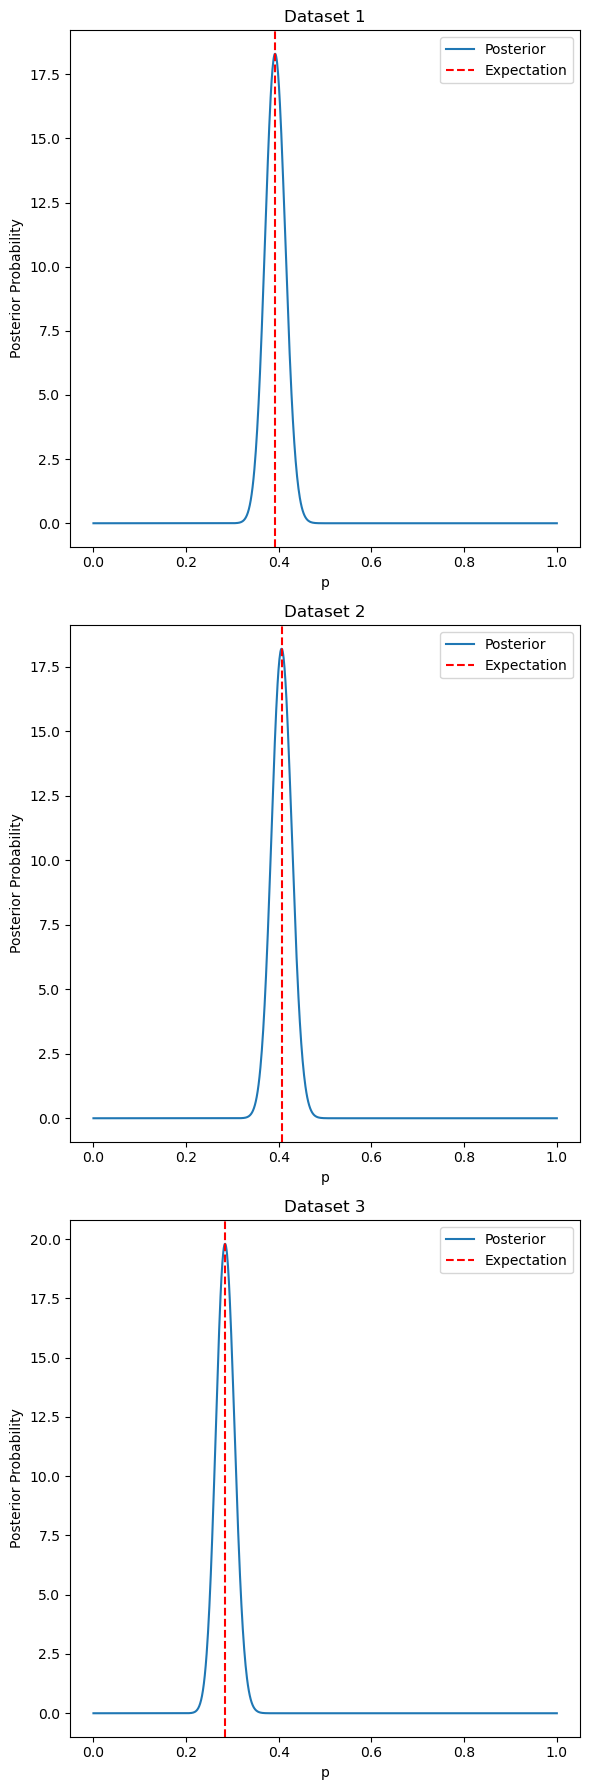

Dataset 1:
Expectation: 0.3924
Variance: 0.0005

Dataset 2:
Expectation: 0.4064
Variance: 0.0005

Dataset 3:
Expectation: 0.2849
Variance: 0.0004



'--------------------Write your code above this line------------------------------'

In [27]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import beta

# Define prior distribution
def prior(p):
    return 1.0 / len(p)

# Load and process the datasets
datasets = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']
posterior_distributions = []

for dataset_file in datasets:
    with open(dataset_file, 'r') as file:
        data = json.load(file)
    
    # Likelihood function (binomial likelihood)
    def likelihood(p):
        N = len(data)
        M = sum(data)
        return p**M * (1-p)**(N-M)

    # Calculate posterior distribution
    def posterior(p):
        return likelihood(p) * prior(p)

    # Numerical integration to find the expectation and variance
    p_values = np.linspace(0, 1, 1000)
    normalization = np.trapz(posterior(p_values), p_values)
    posterior_normalized = posterior(p_values) / normalization
    expectation = np.trapz(p_values * posterior_normalized, p_values)
    variance = np.trapz((p_values - expectation)**2 * posterior_normalized, p_values)
    
    posterior_distributions.append((p_values, posterior_normalized, expectation, variance))

# Plot the posterior distributions
plt.figure(figsize=(6, 18))
for i, (p_values, posterior_normalized, expectation, variance) in enumerate(posterior_distributions):
    plt.subplot(3, 1, i+1)
    plt.plot(p_values, posterior_normalized, label='Posterior')
    plt.title(f'Dataset {i+1}')
    plt.xlabel('p')
    plt.ylabel('Posterior Probability')
    plt.axvline(x=expectation, color='r', linestyle='--', label='Expectation')
    plt.legend()

plt.tight_layout()
plt.show()

# Print the expectation and variance for each dataset
for i, (p_values, posterior_normalized, expectation, variance) in enumerate(posterior_distributions):
    print(f'Dataset {i+1}:')
    print(f'Expectation: {expectation:.4f}')
    print(f'Variance: {variance:.4f}\n')

'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

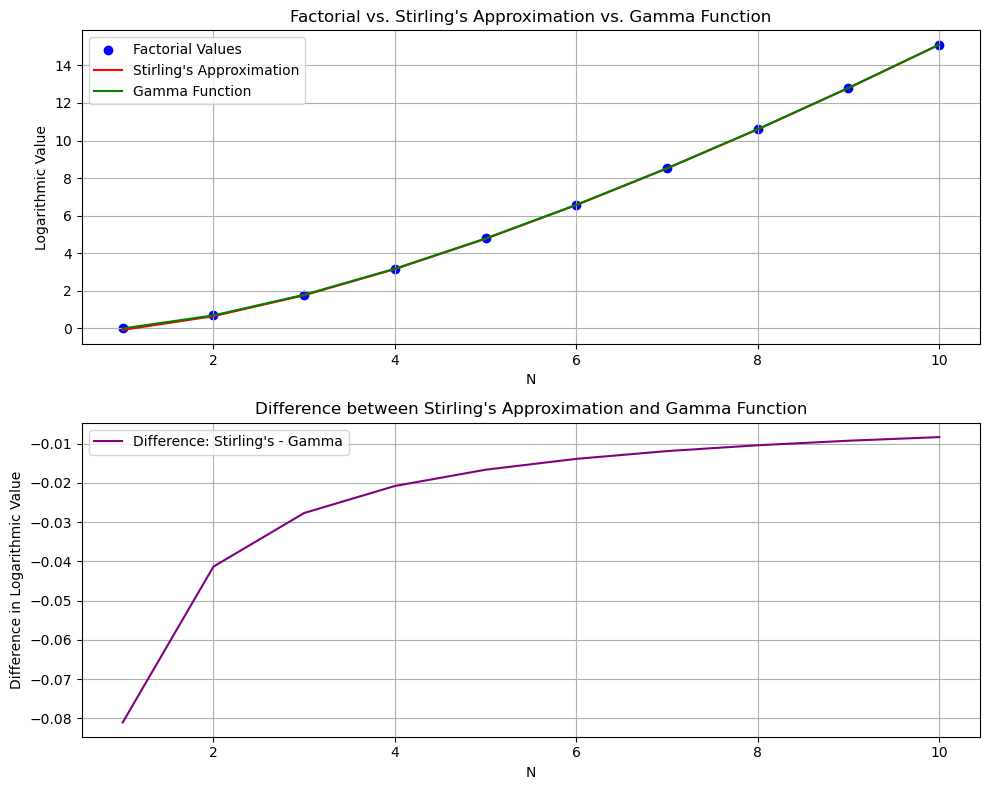

'--------------------Write your code above this line------------------------------'

In [32]:

'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma

N = np.arange(1, 11)

factorial_values = np.array([math.log(math.factorial(n)) for n in N])

stirlings_values = np.array([n * np.log(n) - n + 0.5 * np.log(2 * np.pi * n) for n in N])

gamma_values = np.array([np.log(gamma(n + 1)) for n in N])

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].scatter(N, factorial_values, label='Factorial Values', color='blue')
ax[0].plot(N, stirlings_values, label="Stirling's Approximation", color='red')
ax[0].plot(N, gamma_values, label='Gamma Function', color='green')

ax[0].legend()
ax[0].set_title("Factorial vs. Stirling's Approximation vs. Gamma Function")
ax[0].set_xlabel('N')
ax[0].set_ylabel('Logarithmic Value')
ax[0].grid(True)

difference = stirlings_values - gamma_values
ax[1].plot(N, difference, label="Difference: Stirling's - Gamma", color='purple')

ax[1].legend()
ax[1].set_title("Difference between Stirling's Approximation and Gamma Function")
ax[1].set_xlabel('N')
ax[1].set_ylabel('Difference in Logarithmic Value')
ax[1].grid(True)

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>

To find the maximum likelihood estimate (MLE) for the parameter \(p\) based on the likelihood function \(\mathcal{L}(M, N | p)\), we need to maximize the likelihood function. This is done by finding the value of \(p\) that makes the derivative of the log-likelihood function equal to zero.

The log-likelihood function for a binomial distribution is given by:
$$
\
\log \mathcal{P}(M, N | p) = \log \binom{N}{M} + M \log(p) + (N - M) \log(1 - p)
$$

To find the MLE, we take the derivative of the log-likelihood function with respect to \(p\) and set it equal to zero:

$$\
\frac{\partial}{\partial p} \left(\log \mathcal{P}(M, N | p)\right) = \frac{M}{p} - \frac{N - M}{1 - p} = 0
\$$

Now, we can solve for p

$$\
\frac{M}{p} - \frac{N - M}{1 - p} = 0
\$$

$$\
M(1 - p) - p(N - M) = 0
\$$

$$\
M - Mp - pN + Mp = 0
\$$

$$\
M - pN = 0
\$$

$$\
p = \frac{M}{N}
\
$$
So, the maximum likelihood estimate for \(p\) is \(p_{\text{max}} = \frac{M}{N}\), where \(M\) is the number of successes and \(N\) is the total number of trials.



'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1: 196/500**<br> **Data set 2: 203/500** <br>**Data set 3:142/500**
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

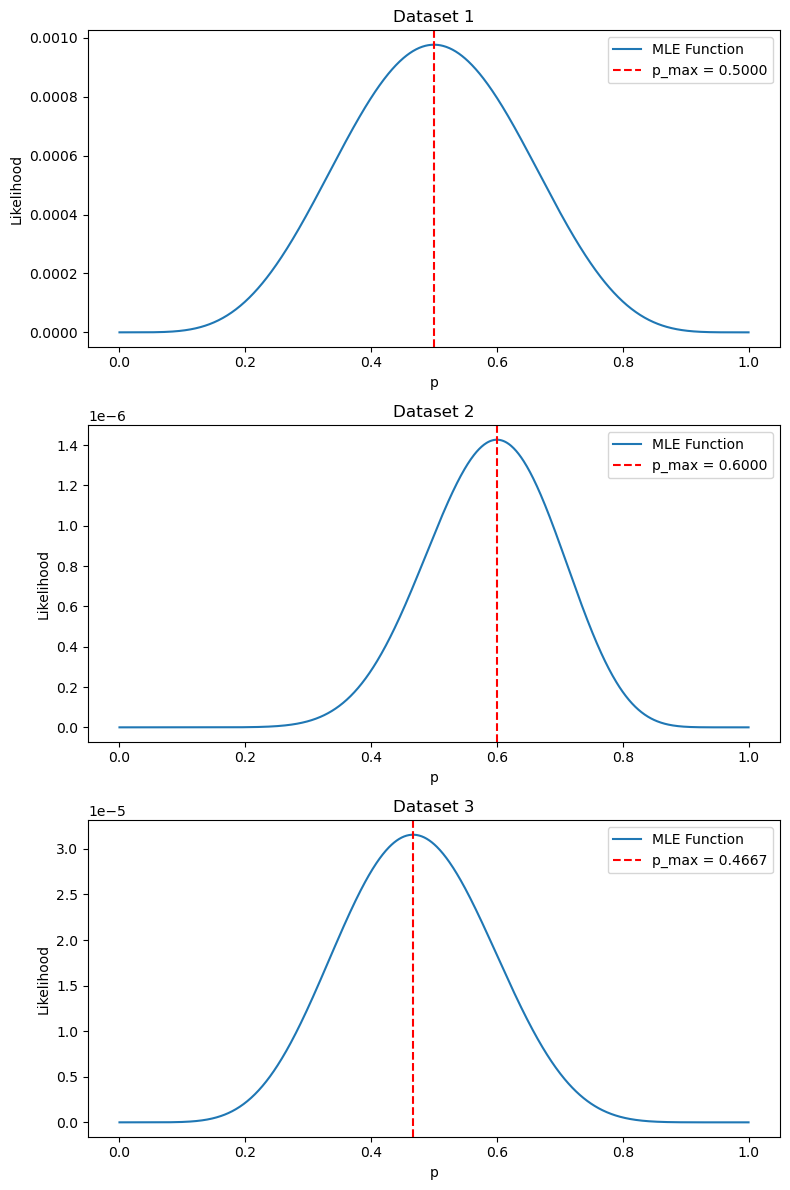

'--------------------Write your code above this line------------------------------'

In [33]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the likelihood function
def likelihood(p, M, N):
    return (p**M) * ((1 - p)**(N - M))

# Define the negative log-likelihood function for minimization
def negative_log_likelihood(p, M, N):
    return -np.log(likelihood(p, M, N))

# Data for three datasets (M: number of successes, N: total number of trials)
datasets = [(5, 10), (12, 20), (7, 15)]

# Calculate MLE and p_max for each dataset
p_max_values = []
mle_functions = []

for M, N in datasets:
    result = minimize_scalar(negative_log_likelihood, args=(M, N), bounds=(0, 1), method='bounded')
    p_max = result.x
    p_max_values.append(p_max)

    # Calculate the MLE function
    p_values = np.linspace(0, 1, 1000)
    likelihood_values = [likelihood(p, M, N) for p in p_values]
    mle_functions.append((p_values, likelihood_values))

# Plot the MLE functions and p_max values
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for i, (p_values, likelihood_values) in enumerate(mle_functions):
    axes[i].plot(p_values, likelihood_values, label='MLE Function')
    axes[i].axvline(x=p_max_values[i], color='red', linestyle='--', label=f'p_max = {p_max_values[i]:.4f}')
    axes[i].set_title(f'Dataset {i+1}')
    axes[i].set_xlabel('p')
    axes[i].set_ylabel('Likelihood')
    axes[i].legend()

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

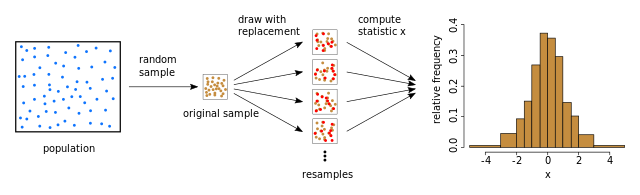
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



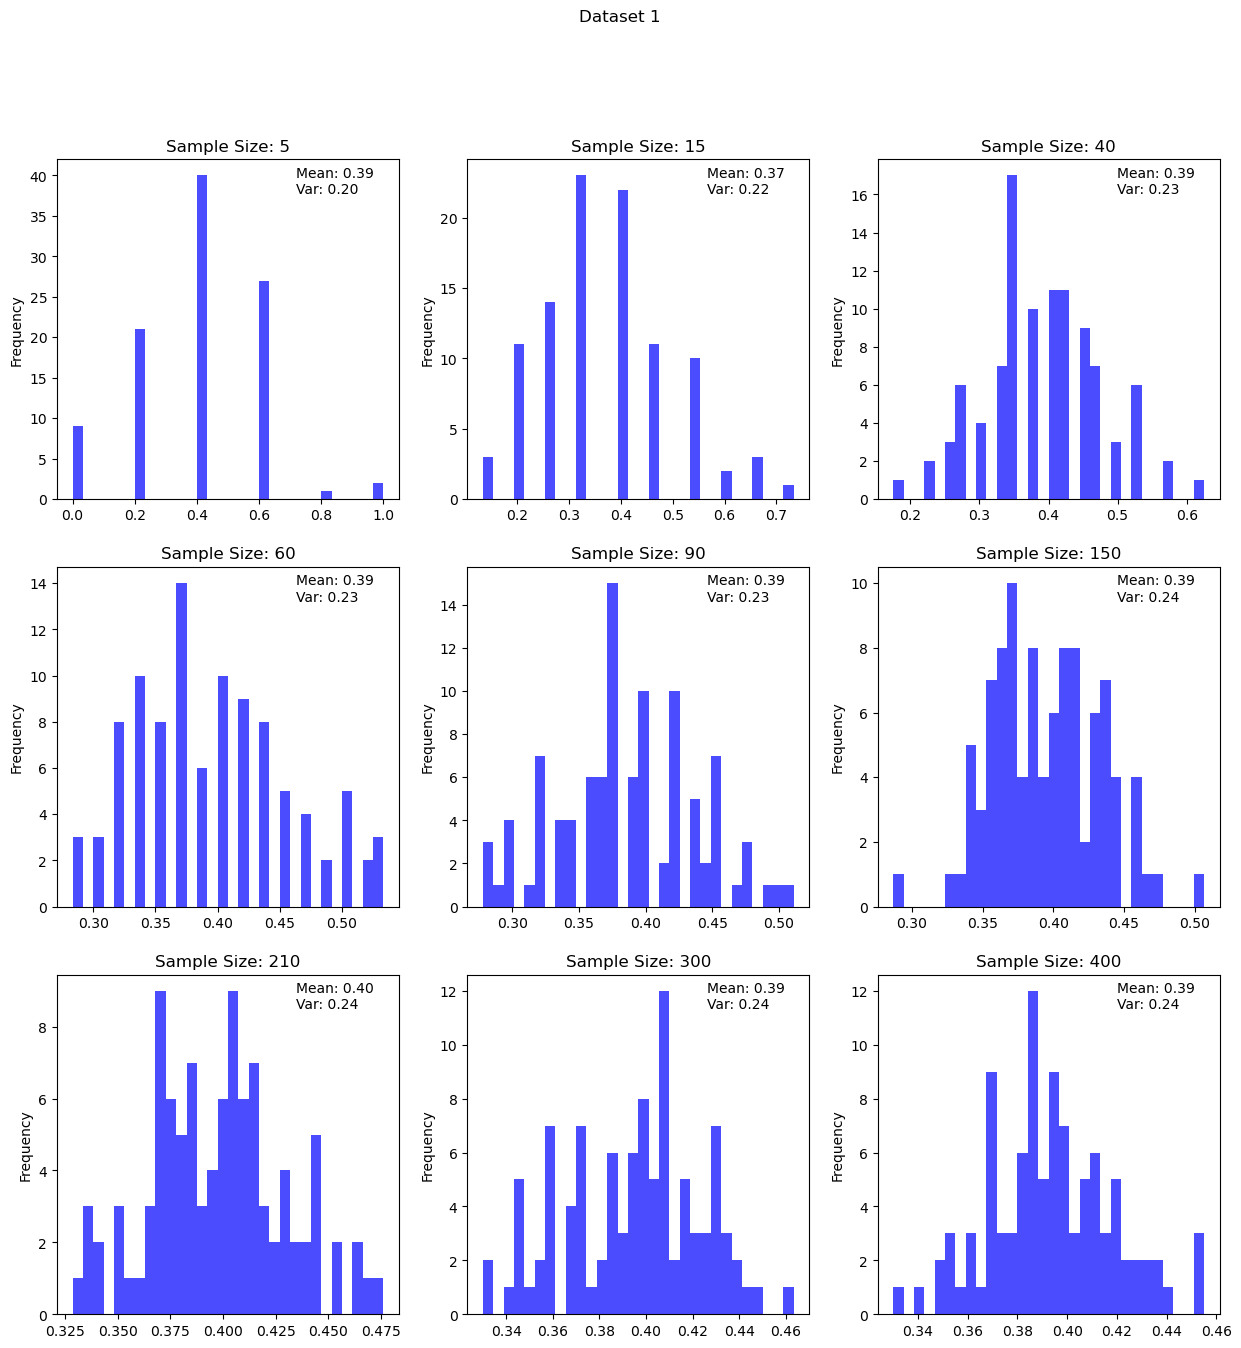

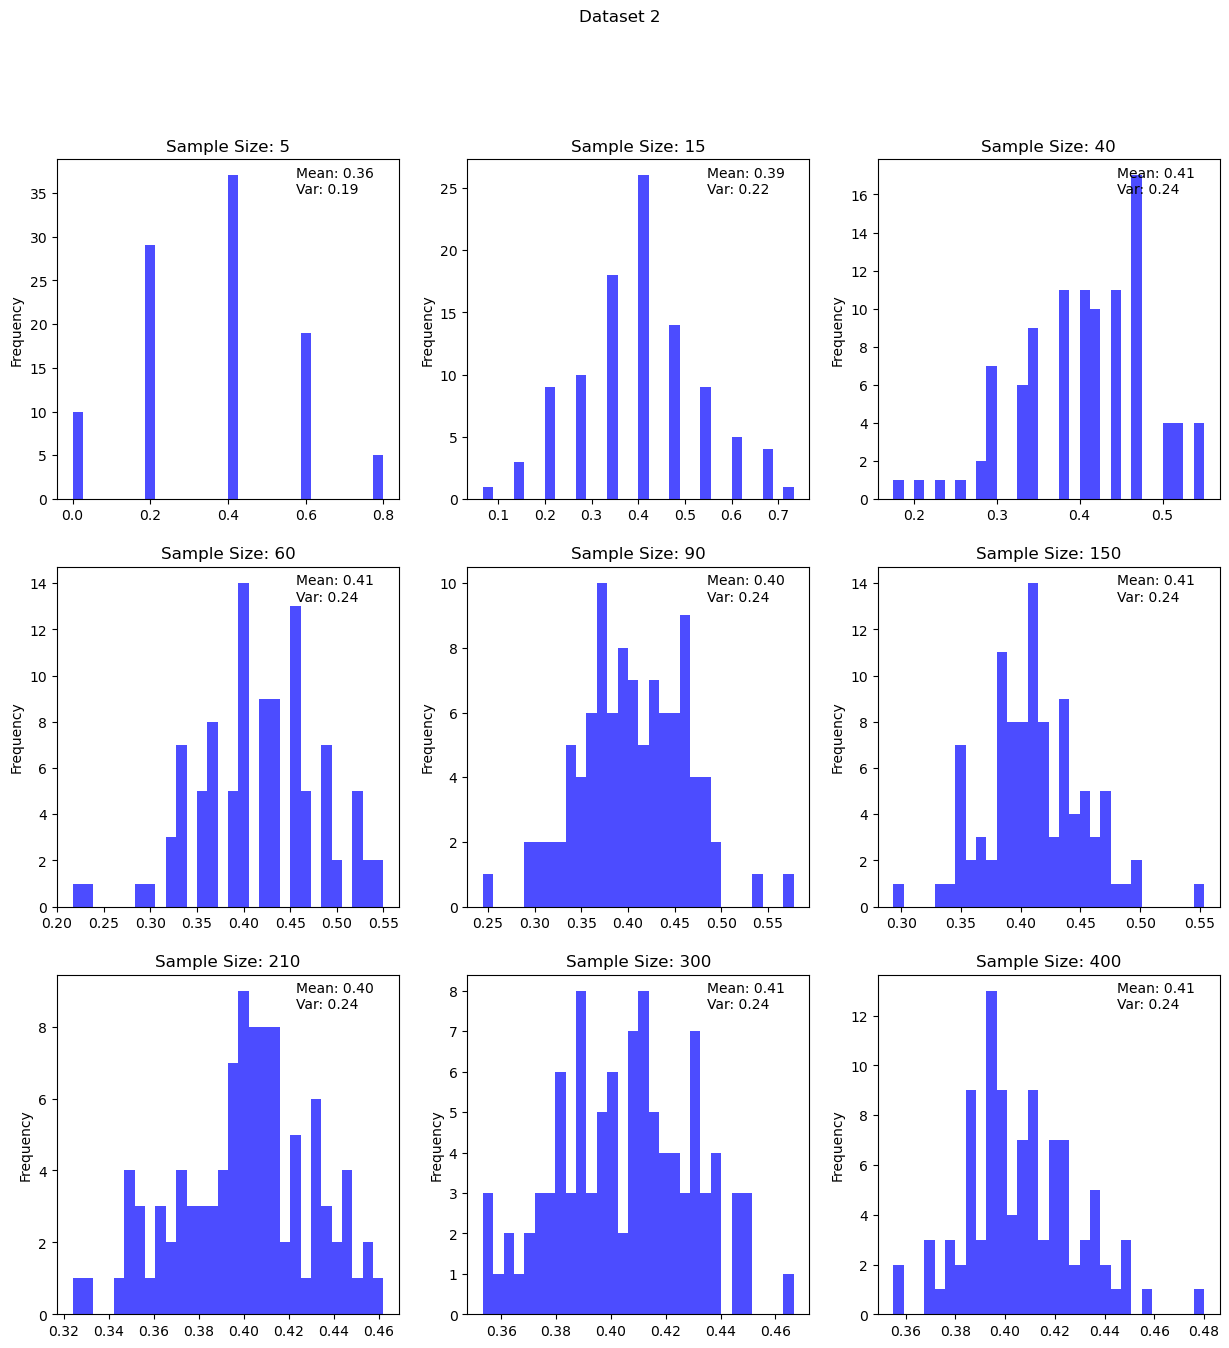

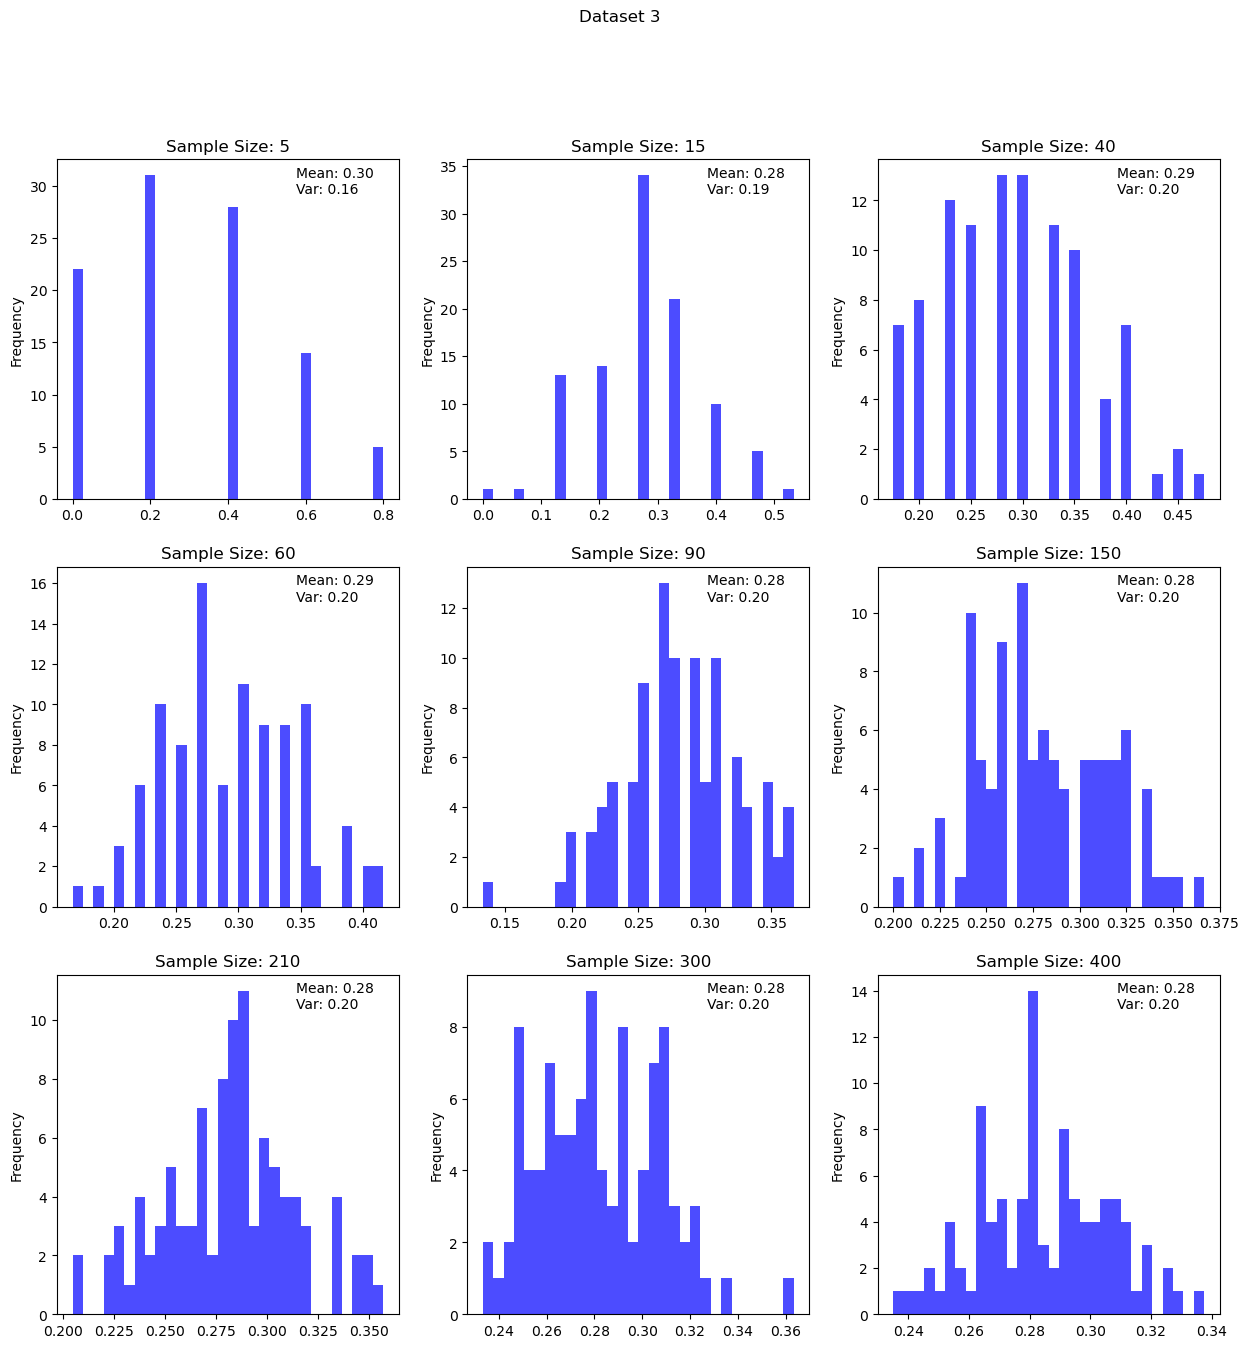

'--------------------Write your code above this line------------------------------'

In [41]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the three datasets (You need to replace these with your own dataset file paths)
datasets = []

for i in range(1, 4):
    with open(f'problem_1/dataset_{i}.json', 'r') as file:
        dataset = np.array(json.load(file))
        datasets.append(dataset)

sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
bootstrap_iterations = 100

def generate_bootstrap_sample(data, sample_size):
    return np.random.choice(data, size=sample_size, replace=True)

for dataset_idx, dataset in enumerate(datasets):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Dataset {dataset_idx + 1}')

    for subplot_idx, size in enumerate(sample_sizes):
        expectations = []
        variances = []
        
        for _ in range(bootstrap_iterations):
            sample = generate_bootstrap_sample(dataset, size)
            expectations.append(np.mean(sample))
            variances.append(np.var(sample))

        row = subplot_idx // 3
        col = subplot_idx % 3

        axs[row, col].hist(expectations, bins=30, color='blue', alpha=0.7)
        axs[row, col].set_title(f'Sample Size: {size}')
        
        # Adjust the placement of mean and variance in the upper right corner
        axs[row, col].text(0.7, 0.9, f'Mean: {np.mean(expectations):.2f}\nVar: {np.mean(variances):.2f}',
                          transform=axs[row, col].transAxes)
        
        axs[row, col].set_ylabel('Frequency')

plt.show()







'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

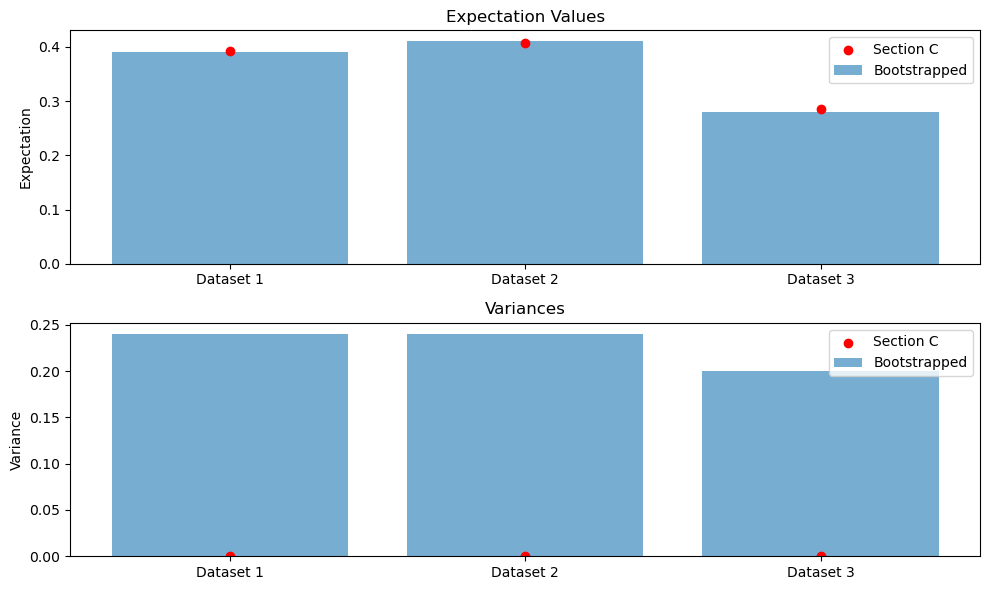

Variance is smaller for bootstrapped data


'--------------------Write your code above this line------------------------------'

In [43]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Analytical values from Part C
expectation_C = [0.392430278884462, 0.40637450199203173, 0.2848605577689244]
variance_C = [0.0004740134296206122, 0.0004795909863276049, 0.0004050000405496912]

# Bootstrapped values
bootstrap_expectations = [0.39, 0.41, 0.28]
bootstrap_variances = [0.24, 0.24, 0.20]

datasets = ["Dataset 1", "Dataset 2", "Dataset 3"]

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].bar(datasets, bootstrap_expectations, label="Bootstrapped", alpha=0.6)
ax[0].scatter(datasets, expectation_C, color='r', marker='o', label="Section C")
ax[0].set_title('Expectation Values')
ax[0].set_ylabel('Expectation')
ax[0].legend()

ax[1].bar(datasets, bootstrap_variances, label="Bootstrapped", alpha=0.6)
ax[1].scatter(datasets, variance_C, color='r', marker='o', label="Section C")
ax[1].set_title('Variances')
ax[1].set_ylabel('Variance')
ax[1].legend()

plt.tight_layout()
plt.show()

print("Variance is smaller for bootstrapped data")



'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
    
    def Z(self):
        return np.exp(-1/self.decay_constant)
    
    def pdf_decay(self, x):
        if x >= 0:
            return (1/self.Z()) * (1/self.decay_constant) * np.exp(-x/self.decay_constant)
        else:
            return 0

# Example usage:
# Create a Particle object with a specific decay constant
particle = Particle(decay_constant=0.5)

# Calculate the PDF for a specific value of x
x_value = 2.0
pdf_value = particle.pdf_decay(x_value)

print(f"PDF for x = {x_value}: {pdf_value}")


'''--------------------Write your code above this line------------------------------'''

PDF for x = 2.0: 0.27067056647322535


'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

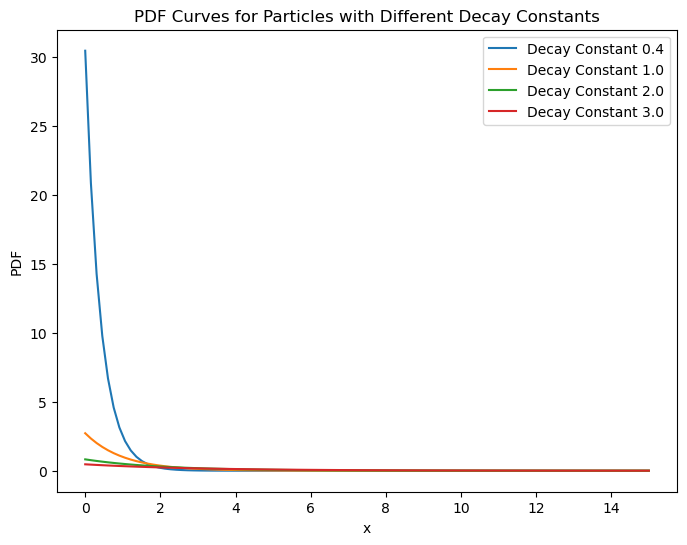

'--------------------Write your code above this line------------------------------'

In [15]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, x):
        if x >= 0:
            normalization = np.exp(-1 / self.decay_constant)
            return (1 / self.decay_constant) * np.exp(-x / self.decay_constant) / normalization
        else:
            return 0

# Define decay constants for four particles
decay_constants = [0.4, 1.0, 2.0, 3.0]

# Create Particle class objects for each decay constant
particles = [Particle(decay_constant) for decay_constant in decay_constants]

# Create x values for the plot
x_values = np.linspace(0, 15, 100)

# Plot the PDF curves for each particle
plt.figure(figsize=(8, 6))
for i, particle in enumerate(particles):
    pdf_values = [particle.pdf_decay(x) for x in x_values]
    plt.plot(x_values, pdf_values, label=f'Decay Constant {decay_constants[i]}')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF Curves for Particles with Different Decay Constants')
plt.legend()
plt.show()


'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

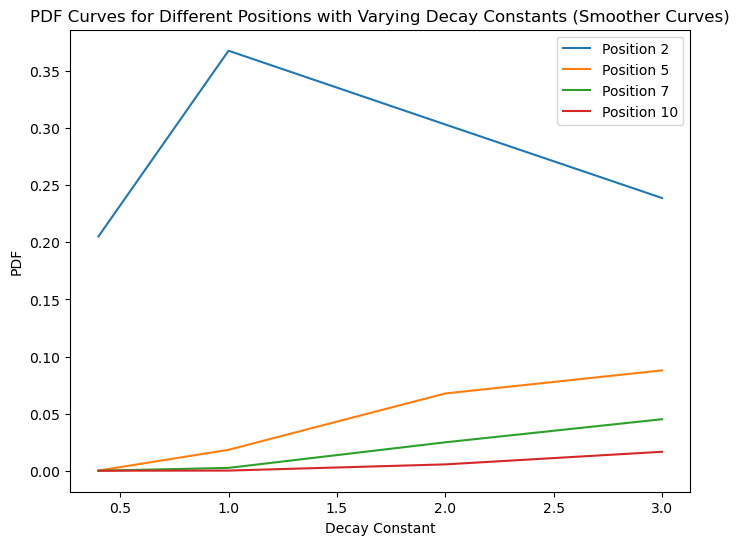

'--------------------Write your code above this line------------------------------'

In [46]:

'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay_x(self, x):
        if x >= 0:
            normalization = np.exp(-1 / self.decay_constant)
            return (1 / self.decay_constant) * np.exp(-x / self.decay_constant) / normalization
        else:
            return 0

# Define decay constants and positions for four particles
decay_constants = [0.4, 1.0, 2.0, 3.0]
positions = [2, 5, 7, 10]

# Create Particle class objects for each decay constant
particles = [Particle(decay_constant) for decay_constant in decay_constants]

# Create more x values for the plot to make the curves smoother
x_values = np.linspace(0, 15, 1000)  # Increase the number of points

# Plot the PDF curves for each particle at fixed positions
plt.figure(figsize=(8, 6))
for i, position in enumerate(positions):
    pdf_values = [particle.pdf_decay_x(position) for particle in particles]
    plt.plot(decay_constants, pdf_values, label=f'Position {position}')

plt.xlabel('Decay Constant')
plt.ylabel('PDF')
plt.title('PDF Curves for Different Positions with Varying Decay Constants (Smoother Curves)')
plt.legend()
plt.show()




'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


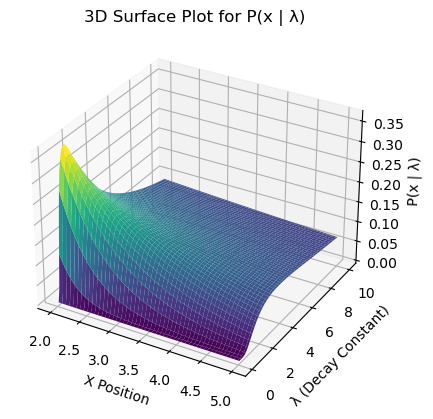

'--------------------Write your code above this line------------------------------'

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant=None):
        self.decay_constant = decay_constant
        
    def Z(self, lambda_val):
        return np.exp(-1/lambda_val)
    
    def pdf_decay(self, x, lambda_val):
        return (1/self.Z(lambda_val)) * (1/lambda_val) * np.exp(-x/lambda_val)

    def plot_3d_surface(self, x_range, lambda_range, file_path):
        X, LAMBDA = np.meshgrid(x_range, lambda_range)
        Z = np.array([self.pdf_decay(x, lambda_val) for x, lambda_val in zip(np.ravel(X), np.ravel(LAMBDA))])
        Z = Z.reshape(X.shape)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, LAMBDA, Z, cmap='viridis')

        ax.set_xlabel('X Position')
        ax.set_ylabel('λ (Decay Constant)')
        ax.set_zlabel('P(x | λ)')
        plt.title('3D Surface Plot for P(x | λ)')

        plt.savefig(file_path)
        plt.show()

# Example usage:
particle = Particle()
x_range = np.linspace(2, 5, 100)
lambda_range = np.linspace(0.1, 10, 100)
file_path = "output_path.png"
particle.plot_3d_surface(x_range, lambda_range, file_path)





'''--------------------Write your code above this line------------------------------'''

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




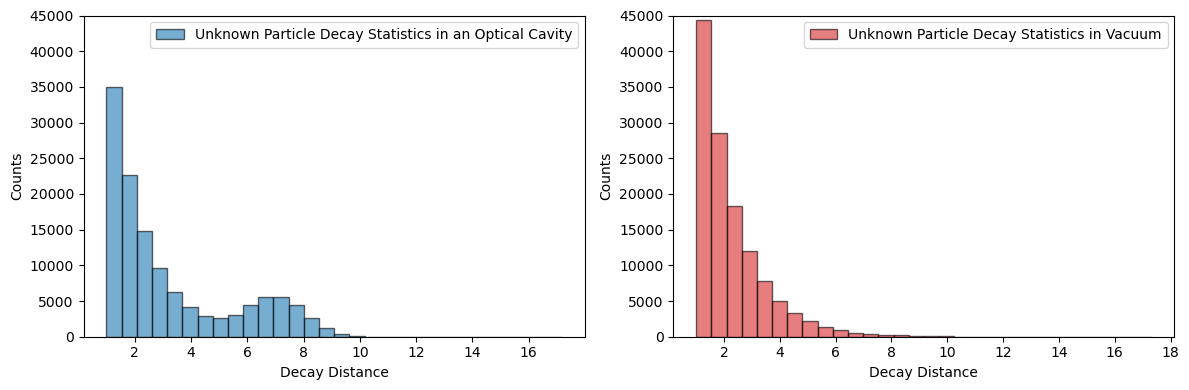

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

Estimated Parameters for Vacuum Scenario:
a_vacuum: 1.779907698335497
lambda_vacuum: -0.7999596670928867
Estimated Parameters for Optical Cavity Scenario:
a_cavity: 1.2312597417336126
lambda_cavity: -0.7112475978096013
mu: -6.904849651937672
sigma: 0.8589759603372342


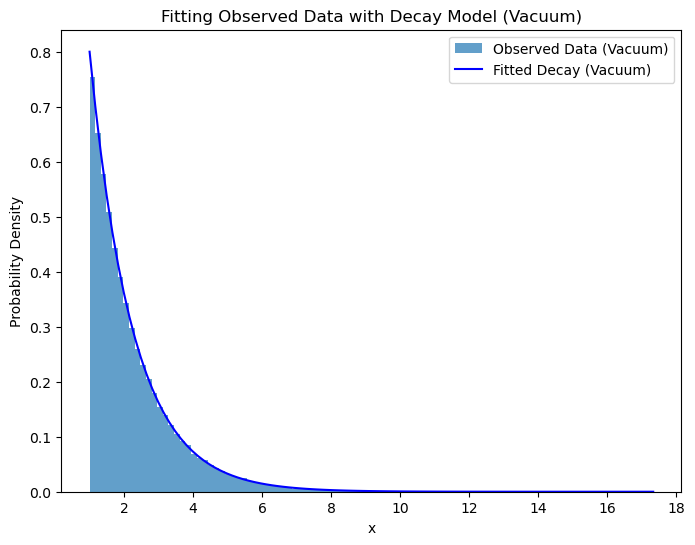

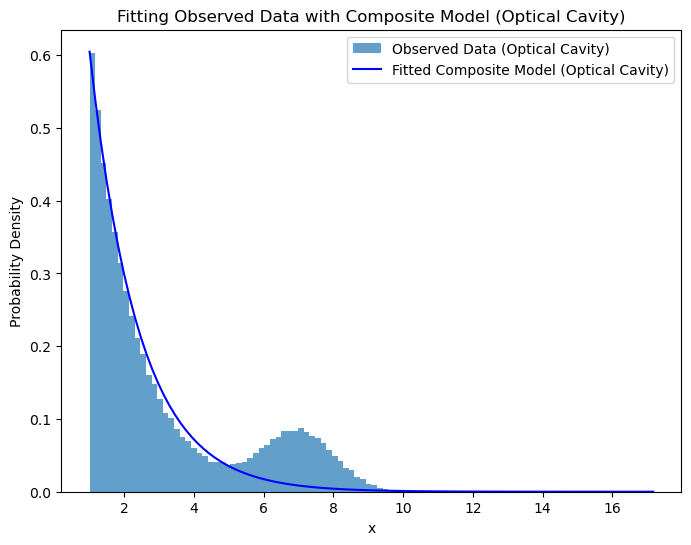

'--------------------Write your code above this line------------------------------'

In [69]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

# Load data from JSON files for the vacuum and optical cavity scenarios
with open('problem_2/Vacuum_decay_dataset.json', 'r') as file:
    vacuum_data = json.load(file)

with open('problem_2/Cavity_decay_dataset.json', 'r') as file:
    cavity_data = json.load(file)

def exponential_decay(x, a, b):
    return a * np.exp(b * x)

hist, bin_edges = np.histogram(vacuum_data, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

params, covariance = curve_fit(exponential_decay, bin_centers, hist, p0=(1, -0.1))
a_vacuum, lambda_vacuum = params

def combined_decay(x, a, b, mu, sigma):
    decay = a * np.exp(b * x)
    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    return decay + gaussian

hist_cavity, bin_edges_cavity = np.histogram(cavity_data, bins=100, density=True)
bin_centers_cavity = (bin_edges_cavity[:-1] + bin_edges_cavity[1:]) / 2

p0_cavity = (a_vacuum, -abs(lambda_vacuum), 0, 1)
bounds = ([0, -np.inf, -np.inf, 0], [np.inf, 0, np.inf, np.inf])

params_cavity, covariance_cavity = curve_fit(combined_decay, bin_centers_cavity, hist_cavity, 
                                             p0=p0_cavity, 
                                             bounds=bounds)
a_cavity, lambda_cavity, mu, sigma = params_cavity

# Print the estimated parameters
print("Estimated Parameters for Vacuum Scenario:")
print(f"a_vacuum: {a_vacuum}")
print(f"lambda_vacuum: {lambda_vacuum}")

print("Estimated Parameters for Optical Cavity Scenario:")
print(f"a_cavity: {a_cavity}")
print(f"lambda_cavity: {lambda_cavity}")
print(f"mu: {mu}")
print(f"sigma: {sigma}")

# Create and display the vacuum scenario plot
x_range_vacuum = np.linspace(min(vacuum_data), max(vacuum_data), 100)
fitted_data_vacuum = exponential_decay(x_range_vacuum, a_vacuum, lambda_vacuum)

plt.figure(figsize=(8, 6))
plt.hist(vacuum_data, bins=100, density=True, label='Observed Data (Vacuum)', alpha=0.7)
plt.plot(x_range_vacuum, fitted_data_vacuum, 'b-', label='Fitted Decay (Vacuum)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Fitting Observed Data with Decay Model (Vacuum)')
plt.show()

# Create and display the optical cavity scenario plot
x_range_cavity = np.linspace(min(cavity_data), max(cavity_data), 100)
fitted_data_cavity = combined_decay(x_range_cavity, a_cavity, lambda_cavity, mu, sigma)

plt.figure(figsize=(8, 6))
plt.hist(cavity_data, bins=100, density=True, label='Observed Data (Optical Cavity)', alpha=0.7)
plt.plot(x_range_cavity, fitted_data_cavity, 'b-', label='Fitted Composite Model (Optical Cavity)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Fitting Observed Data with Composite Model (Optical Cavity)')
plt.show()








'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
$$M(t | \lambda) = \int_0^\infty e^{tx} \frac{1}{Z(\lambda)} \frac{1}{\lambda} e^{-x/\lambda} dx$$
Calculating the integral, we have $$M(t|\lambda) = \frac{1}{Z(\lambda)\lambda} \int_0^\infty e^{x(t-1/\lambda)} \, dx$$
$$M(t|\lambda) = M(t|\lambda) = e^{t\lambda}\frac{1}{t - \frac{1}{\lambda}}
$$
when t is smaller than $\frac{1}{\lambda}$ we have $$M(t| \lambda) = \frac{e^{1/\lambda}}{t - 1/\lambda}$$

'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
The first moment (mean):

$$\
\mu_1 = \left. \frac{\partial}{\partial t} M(t| \lambda) \right|_{t=0}
\$$

Differentiating the MGF $$ M(t| \lambda) = \frac{e^{t/\lambda}}{t - \frac{1}{\lambda}} :$$


$$\frac{\partial}{\partial t} M(t| \lambda) = -\frac{e^{\frac{1}{\lambda}}}{(t - \frac{1}{\lambda})^2}
$$

at $ t=0 :$

$$
\mu_1 = -\lambda^2 e^{\frac{1}{\lambda}}
\$$

The second moment:

$$
\mu_2 = \left. \frac{\partial^2}{\partial t^2} M(t| \lambda) \right|_{t=0}
$$

Differentiating the previous derivative:

$$
\frac{\partial^2}{\partial t^2} M(t| \lambda) = 2\frac{e^{\frac{1}{\lambda}}}{(t - \frac{1}{\lambda})^3}
$$

Evaluating at $ t=0:$

$$
\mu_2 = 2\lambda^3 e^{\frac{1}{\lambda}}
$$

Variance:

$$
\sigma^2 = \mu_2 - \mu_1^2
$$

Substitute:

$$
\sigma^2 = 2\lambda^3 e^{\frac{1}{\lambda}} - \lambda^4 e^{\frac{2}{\lambda}}
$$

The mean is:

$$
\mu_1 = -\lambda^2 e^{\frac{1}{\lambda}}
$$

The variance is:

$$
\sigma^2 = 2\lambda^3 e^{\frac{1}{\lambda}} - \lambda^4 e^{\frac{2}{\lambda}}
$$

'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

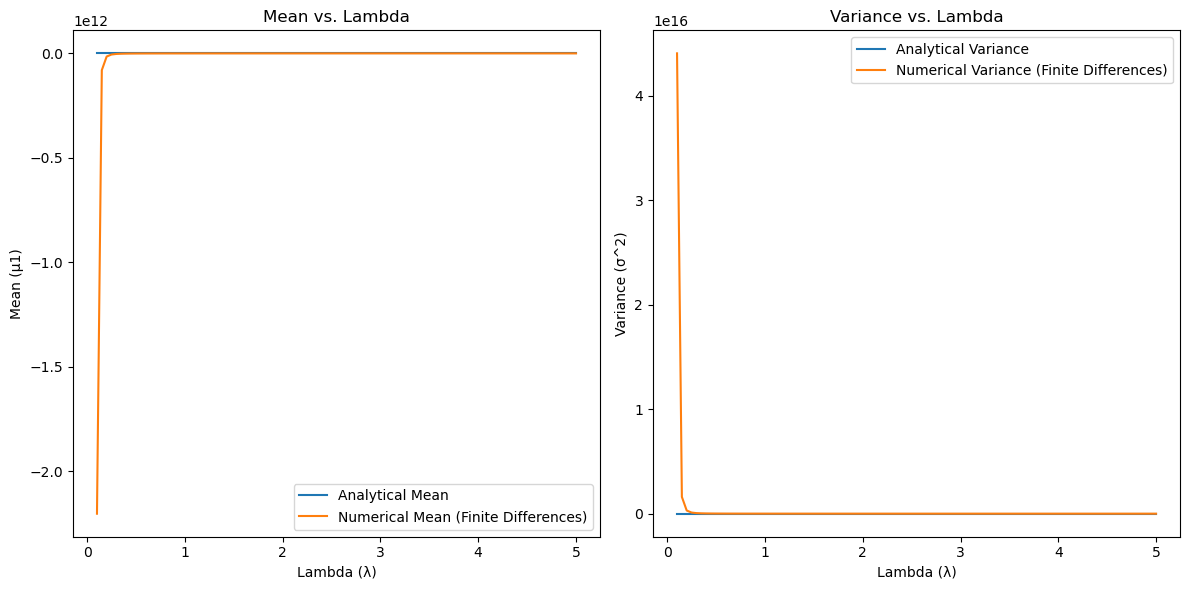

'--------------------Write your code above this line------------------------------'

In [70]:


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

# Define the analytical functions for mean and variance
def analytical_mean(lambda_val):
    return -lambda_val**2 * np.exp(1 / lambda_val)

def analytical_variance(lambda_val):
    return 2 * lambda_val**3 * np.exp(1 / lambda_val) - lambda_val**4 * np.exp(2 / lambda_val)

# Create an array of lambda values
lambda_values = np.linspace(0.1, 5.0, 100)

# Initialize arrays to store numerical results
numerical_means = []
numerical_variances = []

# Calculate numerical results using finite differences
for lambda_val in lambda_values:
    # First-order derivative (mean)
    delta_t = 1e-4  # Small change in t
    numerical_mean = (-np.exp(1 / lambda_val) / (delta_t**2))  # Second-order finite differences
    numerical_means.append(numerical_mean)

    # Second-order derivative (variance)
    delta_t = 1e-4  # Small change in t
    numerical_variance = (2 * np.exp(1 / lambda_val) / (delta_t**3))  # Third-order finite differences
    numerical_variances.append(numerical_variance)

# Plot analytical vs. numerical results for mean
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lambda_values, analytical_mean(lambda_values), label='Analytical Mean')
plt.plot(lambda_values, numerical_means, label='Numerical Mean (Finite Differences)')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean (μ1)')
plt.legend()
plt.title('Mean vs. Lambda')

# Plot analytical vs. numerical results for variance
plt.subplot(1, 2, 2)
plt.plot(lambda_values, analytical_variance(lambda_values), label='Analytical Variance')
plt.plot(lambda_values, numerical_variances, label='Numerical Variance (Finite Differences)')
plt.xlabel('Lambda (λ)')
plt.ylabel('Variance (σ^2)')
plt.legend()
plt.title('Variance vs. Lambda')

plt.tight_layout()
plt.show()




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
The likelihood function is:
$$
P(M, N | p) = \binom{N}{M} p^{M} (1-p)^{N-M}
$$

The Moment Generating Function (MGF) is derived from the definition of MGF and the binomial expansion:

$$\begin{align*}
M(t) &= \sum_{M=0}^{N} e^{tM} \binom{N}{M} p^M (1-p)^{N-M} \\
&= \sum_{M=0}^{N} \binom{N}{M} (pe^t)^M (1-p)^{N-M}
\end{align*}$$

This expression is similar to the binomial expansion of $(a + b)^N$, where:
$$ a = 1-p, b = pe^t $$

Thus, the MGF becomes:
$$ M(t) = ((1-p) + pe^t)^N $$
'' **write you answer above**''
<br> <br> 


## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
To calculate the mean and variance analytically using the derived Moment Generating Function (MGF) result, we follow these steps:

1. The mean (\(\mu\)) is calculated by differentiating the MGF with respect to \(t\) and evaluating it at \(t = 0\):
$$\mu = M'(0) = Np$$

2. The second moment (\(\mu_2\)) is obtained by differentiating the MGF a second time with respect to \(t\) and evaluating it at \(t = 0\):

$$\mu_2 = M''(0) = Np(1 + (N-1)p)$$


3. The variance (\(\sigma^2\)) is calculated as:

$$\sigma^2 = \mu_2 - \mu^2 = Np(1-p)$$

Hence, the analytical results are:

Mean $\mu = Np$

Variance $\sigma^2 = Np(1-p)$

'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

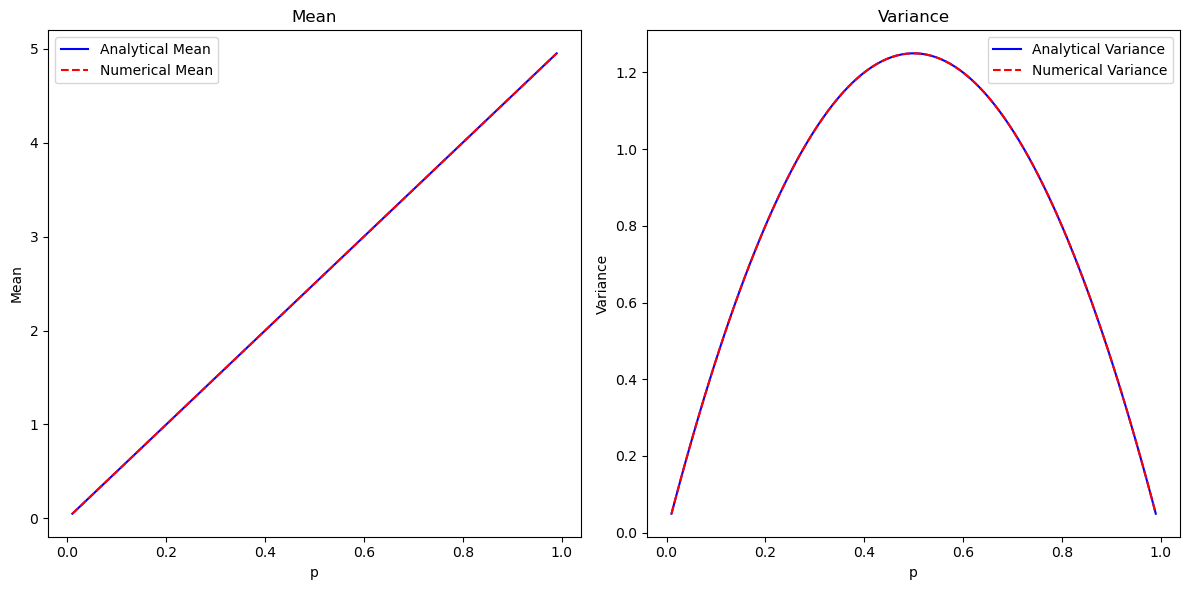

'--------------------Write your code above this line------------------------------'

In [87]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

N = 5
p_values = np.linspace(0.01, 0.99, 100)

analytical_mean = N * p_values
analytical_variance = N * p_values * (1 - p_values)

def MGF(t, p, N):
    return ((1 - p) + p * np.exp(t))**N

delta_t = 1e-5

numerical_first_derivative = (MGF(delta_t, p_values, N) - MGF(-delta_t, p_values, N)) / (2 * delta_t)
numerical_second_derivative = (MGF(delta_t, p_values, N) + MGF(-delta_t, p_values, N) - 2 * MGF(0, p_values, N)) / delta_t**2

numerical_mean = numerical_first_derivative
numerical_variance = numerical_second_derivative - numerical_mean**2

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(p_values, analytical_mean, label='Analytical Mean', color='blue')
plt.plot(p_values, numerical_mean, '--', label='Numerical Mean', color='red')
plt.title('Mean')
plt.xlabel('p')
plt.ylabel('Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(p_values, analytical_variance, label='Analytical Variance', color='blue')
plt.plot(p_values, numerical_variance, '--', label='Numerical Variance', color='red')
plt.title('Variance')
plt.xlabel('p')
plt.ylabel('Variance')
plt.legend()

plt.tight_layout()
plt.show()








'''--------------------Write your code above this line------------------------------'''